<img src = "https://upload.wikimedia.org/wikipedia/commons/e/e2/Confidence-interval.svg" width="540"/>

# Introducción a la probabilidad

## Contenido

1. Muestreo aleatorio simple, estratificado y sistemático de una población
2. Interpretación de probabilidad, funciones de densidad, funciones de variables aleatorias. Distribuciones exponenciales, gaussianas, normales-logarítmicas, chi-cuadrado ($\chi ^{2}$).
3. Valores esperados, funciones binomiales y multinomiales, distribución de Poisson, distribución uniforme.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 06/23/2022

## Conceptos clave:

1. Población: El conjunto completo o "universo", en general no es posible tener acceso al conjunto.
2. Muestra: Un subconjunto incompleto, se requiere que sea representativa para extraer conclusiones sobre la población completa.
3. Estimadores estadísticos: Funciones matemáticas dependientes de la muestra como la media, moda, mediana, etc.

## Ejemplo 1: Escoger entre dos cajas


In [2]:
data = np.array([1,2,2,1,1,1,1,2,2,1,1,2,2,2,1,2,2,2,1,2]) # Esta población es pequeña así que es igual a la muestra, pero  
print(len(data))                                           # conceptualmente no son iguales.

20


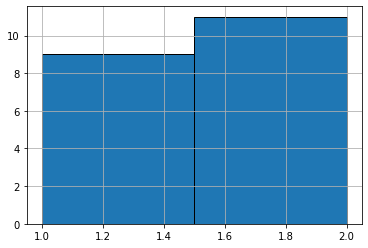

In [3]:
plt.hist(data, bins = 2, ec = 'k') # bins = cajas ; ec = 'edge color'
plt.grid() # Cuadrícula

La gráfica anterior es un [**histograma**](https://es.wikipedia.org/wiki/Histograma#Tipos_de_gráficos_relacionados_con_el_histograma) que representa la frecuencia absoluta por clase entre dos eventos, siendo el eje ordenado la frecuencia y el eje de abscizas las clases. En este caso la primera barra representa la frecuencia con la que fue escogida la caja 1, y la segunda barra representa la frecuencia con la que fue escogida la caja 2. En este experimento hubo sesgo por comentarios del experimentador y porque los participantes conocían las respuestas previas, incluso así las frecuencias de 1 y 2 son bastante cercanas.

## Muestreo

En poblaciones más grandes que no son accesibles, es necesario escoger muestras representativas para evitar sesgos y que las conclusiones extraídas de los datos sean lo más fiel posible a la realidad, para esto se utiliza el [**muestreo**](https://es.wikipedia.org/wiki/Muestreo_(estadística) ); técnicas para seleccionar muestras representativas con propiedades extrapolables a la población minimizando los sesgos, en todo muestreo hay posibilidad de sesgo y un margen de error.
    
## Ejemplo 2: Muestreo sistemático

In [4]:
l = [0,-1,-3,-5,5,7,4,10,12,15,20,19,50,55,60,45] # Población

np.sort(l) # El comando sort genera un array con los elementos de la lista ordenados de menor a mayor

array([-5, -3, -1,  0,  4,  5,  7, 10, 12, 15, 19, 20, 45, 50, 55, 60])

In [5]:
sorted_l = np.sort(l)[::-1] # Este método de indexación invierte el orden de menor a mayor, dejando un array ordenado de mayor
sorted_l                    # a menor.

array([60, 55, 50, 45, 20, 19, 15, 12, 10,  7,  5,  4,  0, -1, -3, -5])

In [6]:
n = 8                      # Tamaño de muestra
k = int(len(l)/n)          # Coeficiente de elevación K = N/n, donde N es el tamaño de la población

i_0 = np.random.randint(k) # Esta función escoge un número entero aleatorio entre 1 y K

Sample = np.zeros(n)       # Esta función crea un array 1D de tamaño n lleno de 0's

Sample[0] = sorted_l[i_0]  # El primer elemento de la muestra será el elemento en la posición i_0 de la población

for i in range(1,n):       # Y desde la posición i_0, se escogerá el elemento en la posición i_0 + k para la muestra
    i_0 += k
    Sample[i] = sorted_l[i_0]
    
Sample # Correr varias veces este bloque mostrará las posibilidades de muestreo para esta población y tamñaño de muestra

array([55., 45., 19., 12.,  7.,  4., -1., -5.])

## Ejemplo 3: Muestreo ponderado de asistentes a un evento

In [7]:
url = 'https://raw.githubusercontent.com/asegura4488/Estadistica_Herramientas/main/Data/Sesion2/DatosEstratificados.csv'
df = pd.read_csv(url, sep = ',')
df

,Salon,Asistentes
0,Salon_A,40
1,Salon_B,100
2,Salon_C,95
3,Salon_D,70
4,Salon_E,510
5,Salon_F,200
6,Salon_G,150
7,Salon_H,125
8,Salon_I,310
9,Salon_J,400


In [8]:
# Extra: Suma total sin usar np.sum()
asistentes = df.Asistentes
suma = 0
for i in range(len(asistentes)):
    suma += asistentes[i]
suma

2000

In [9]:
Total = np.sum(asistentes)
Total

df = df.assign(Porcentaje = asistentes/Total) # Se asigna a cada clase el peso porcentual que tiene sobre el total de 
                                              # asistentes.

muestra = 200 # Número entero de asistentes encuestados.
df = df.assign(Encuestados = muestra*df.Porcentaje)
df

,Salon,Asistentes,Porcentaje,Encuestados
0,Salon_A,40,0.0200,4.0
1,Salon_B,100,0.0500,10.0
2,Salon_C,95,0.0475,9.5
3,Salon_D,70,0.0350,7.0
4,Salon_E,510,0.2550,51.0
5,Salon_F,200,0.1000,20.0
6,Salon_G,150,0.0750,15.0
7,Salon_H,125,0.0625,12.5
8,Salon_I,310,0.1550,31.0
9,Salon_J,400,0.2000,40.0


In [10]:
print(np.sum(df.Encuestados))

200.0


La librería *Pandas* soporta archivos xlsx, csv, etc. También puede generarlos para que otras personas puedan usar nuestros datos, para generar un libro de excel a partir de los datos de este ejemplo se utilizaría el código:
```python
df.to_excel('NumeroEncuestados.xlsx',sheet_name='Encuesta1',index=False)
```

## Experimento: ¿Probabilidad frecuentista?

Al lanzar un dado, si este dado no está cargado para favorecer un resultado, esperaríamos que pasados muchos lanzamientos la proporción de cada número con respecto al total fuera aproximadamente $\frac{1}{6}$, esta es su **probabilidad**. En este experimento el evento de interés será el número 3, e intentaremos comprobar si pasados muchos lanzamientos la probabilidad se aproxima a $\frac{1}{6}$.

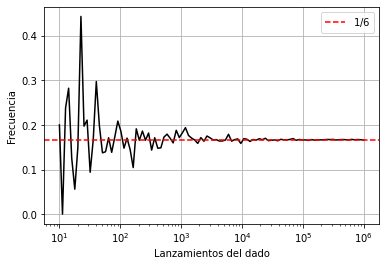

In [11]:
Evento = 3

def GetFrecuencias(N:int): # ¿Cuántas veces sucedió el evento de interés en N lanzamientos del dado?
    
    NTimes = 0 # Contador que incrementa cada vez que el lanzamiento es igual al evento de interés
    
    for i in range(int(N)):
        lanzamiento = np.random.randint(1,7) # Dado que la indexación de Python empieza en 0, hay que sumar +1 al límite
                                             # superior del rango.
        if lanzamiento == Evento:
            NTimes += 1
    
    return NTimes/N

n = np.logspace(1,6,100)
freqs = np.zeros(len(n))

for i in range(len(n)):
    freqs[i] = GetFrecuencias(n[i])
    
plt.plot(n,freqs,c='k')
plt.grid()
plt.xlabel('Lanzamientos del dado')
plt.ylabel('Frecuencia')
plt.axhline(y=1/6,color='r',ls='--',label = r'$1/6$')
plt.xscale('log')
plt.legend()
plt.show()

Durante todos los lanzamientos aleatorios del experimento la probabilidad del evento de interés se mantiene dentro del rango $[0,1]$, y conforme aumenta el número de lanzamientos, la probabilidad efectivamente se aproxima a $\frac{1}{6}$

# 06/28/2022

## Experimento: Probabilidad de una suma de dos dados

Nuevamente lanzaremos dados, pero en esta ocasión se lanzarán dos y el resultado que nos interesa será su suma, esto modifica las probabilidades y todo el espacio muestral. ¿Será favorecido algún resultado más que los demás?

In [12]:
def GetExperiments(N:int): # N lanzamientos de los dados
    
    Sumas = np.zeros(N) # Cada resultado se guardará como un elemento en un array de tamaño N
    
    for i in range(int(N)):
        
        d1 = np.random.randint(1,7) # Lanzamiento aleatorio del dado 1
        d2 = np.random.randint(1,7) # Lanzamiento aleatorio del dado 2
        
        Sumas[i] = d1+d2
        
    return Sumas

GetExperiments(3) # Ejemplo: Lanzar los dados 3 veces, se registran sus sumas:

array([ 8.,  7., 12.])

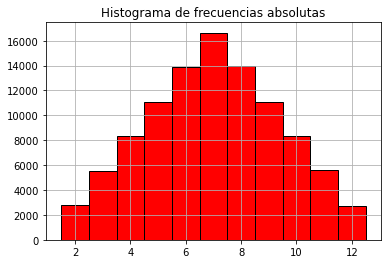

Frecuencias absolutas de cada suma de los dados:

 [[    2  2791]
 [    3  5562]
 [    4  8357]
 [    5 11107]
 [    6 13858]
 [    7 16643]
 [    8 13972]
 [    9 11053]
 [   10  8339]
 [   11  5595]
 [   12  2723]]

Área del histograma = 100000.0


In [13]:
N = 100000
Freq = GetExperiments(N)

# plt.hist(Freq) Este comando imprimiría un histograma poco inteligible y con una caja extra por indexación del array

x = np.linspace(2,13,12) # El espacio muestral va de la mínima suma posible de 2 a la máxima suma posible de 12,
                         # pero nuevamente se suma uno por el rango e indexación de de la función linspace()
    
h, bins = np.histogram(Freq, bins=x)
w = np.diff(bins) # Array de anchos de cada clase, np.diff() calcula la diferencia entre elementos de un array, 1 en este caso

sumas = np.array(bins[:-1],dtype = int) # bins indexado para eliminar la columna que sobra
h = np.array(h,dtype = int)

plt.bar(sumas, h, color='r', ec='k', width=w ) 
plt.grid()
plt.title("Histograma de frecuencias absolutas")
plt.show()

print("Frecuencias absolutas de cada suma de los dados:\n\n",np.vstack((sumas,h)).T)
I = np.sum(w*h); print('\nÁrea del histograma =',I)

Este histograma muestra que la suma más frecuente en el espacio muestral del experimento es 7, pero cuando se habla de probabilidad se impone la condición de que debe ser un número dentro del rango $[0,1]$ y la suma de probabilidades de todo el espacio muestral sea igual a $1$, por lo que si el objetivo es que el área del histograma represente probabilidad, este debe ser normalizado:

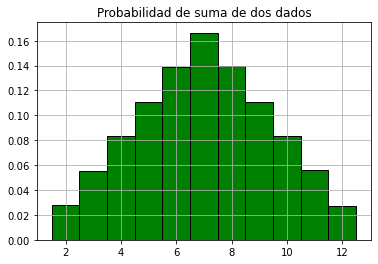

Probabilidad para cada suma de los dados:

 [[ 2.       0.02791]
 [ 3.       0.05562]
 [ 4.       0.08357]
 [ 5.       0.11107]
 [ 6.       0.13858]
 [ 7.       0.16643]
 [ 8.       0.13972]
 [ 9.       0.11053]
 [10.       0.08339]
 [11.       0.05595]
 [12.       0.02723]]

Área del histograma = 1.0000000000000002


In [14]:
hnorm = h/I

plt.bar( sumas, hnorm, color='g', ec='k', width=w )
plt.grid()
plt.title("Probabilidad de suma de dos dados")
plt.show()

print("Probabilidad para cada suma de los dados:\n\n",np.vstack((sumas,hnorm)).T)
A_norm= np.sum(w*hnorm); print('\nÁrea del histograma =',A_norm)

Por la manera en que un computador representa variables de floating point el resultado del área total del histograma no es calculada como un valor entero pero esta presentación puede ser modificada con ```round()``` para que el valor impreso sea el número entero.

Visualmente este histograma parece indicar que al lanzar dos dados su suma más probable es 7, y analizando todas las posibles configuraciones de los dados en el espacio muestral se encuentra que el 7 es efectivamente la suma con el mayor número de posibilidades. Sin embargo también existe otro argumento matemático para demostrar el número más probable en este experimento, o en otras palabras, el **valor esperado** de la suma de lanzar dos dados, este se realiza con un promedio ponderado:

$$\mathbb{E}(X) = x_1 w_1 + x_2 w_2 + ... + x_i w_i$$

Para una variable aleatoria discreta $X$, el valor esperado o la esperanza $\mathbb{E}(X)$ será la suma del valor de cada suceso aleatorio $x_i$ multiplicado por la función de probabilidad $w_i$ para el suceso, de forma más general:

$$\mathbb{E}(X) = \sum_{i = 1}^{n} x_i P(x_i)$$


In [15]:
E = np.sum(x[:11]*hnorm[:11])
E # Esperanza en el experimento es un valor próximmo a 7

6.99744